In [1]:
#Miniproject:
import pandas as pd

df=pd.read_excel('US Superstore data.xls')
df.isnull().sum()
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Year'] = df['Order Date'].dt.year
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


<ipython-input-7-73ce78acde29>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="State", data=state_sales, palette="viridis")


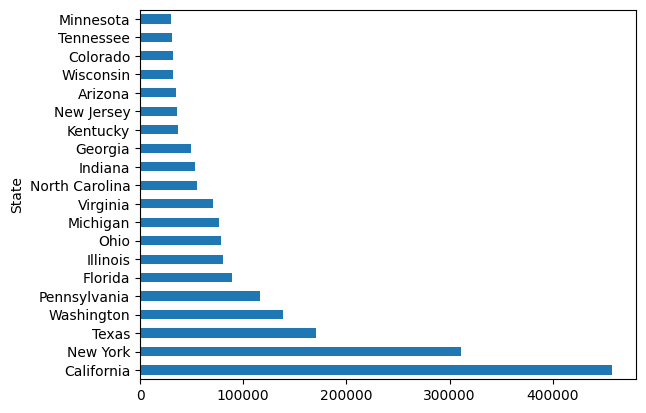

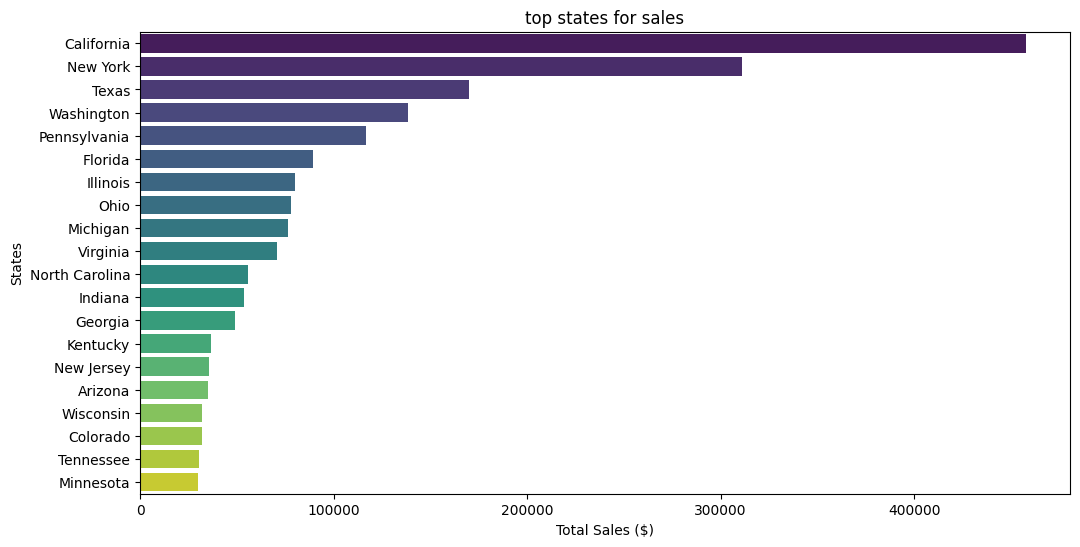

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20).plot.barh()
state_sales = df.groupby("State")["Sales"].sum().reset_index()

# Sort states by descending sales
state_sales = state_sales.sort_values(by="Sales", ascending=False)
state_sales = state_sales.sort_values(by="Sales", ascending=False).head(20)

# Graphic creation
plt.figure(figsize=(12, 6))
sns.barplot(x="Sales", y="State", data=state_sales, palette="viridis")
plt.xlabel("Total Sales ($)")
plt.ylabel("States")
plt.title("top states for sales")

plt.show()

<Axes: xlabel='State', ylabel='Sales'>

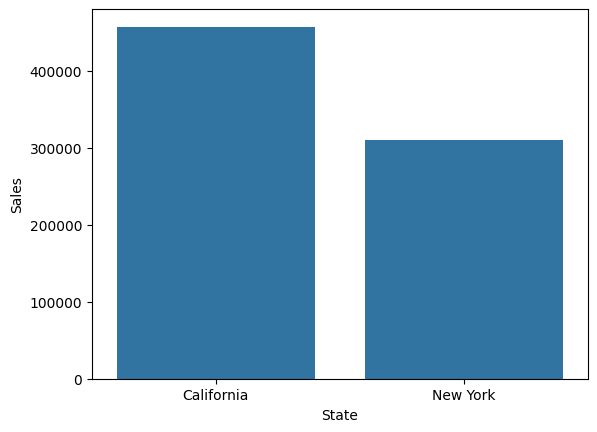

In [27]:
# 3:Difference between New York and California
df_cal_newyrk=df[df['State'].isin(['New York', 'California'])]
state_comparison = df_cal_newyrk.groupby("State")[["Sales", "Profit"]].sum().reset_index()

sns.barplot(x='State', y='Sales', data=state_comparison)
sns.barplot(x='State', y='Profit', data=state_comparison)
# The profit level is almost identical between California and New York. The difference can be seen in the amount of sales where California has a higher amount of sales.

In [12]:
#4:
outstanding_customer = df[df['State'] == 'New York'].groupby('Customer Name')['Sales'].sum().idxmax()
print(outstanding_customer)
# The outstanding_customer is Tom Ashbrook

Tom Ashbrook


In [13]:
# 5:
state_profit = df.groupby("State")[["Profit"]].sum().reset_index()

# Sort states by decreasing profit
state_profit = state_profit.sort_values(by="Profit" ,ascending=False)
print(type(state_profit))
# Show Top 5 Most Profitable States

print(state_profit.head(5))

<class 'pandas.core.frame.DataFrame'>
         State      Profit
3   California  76381.3871
30    New York  74038.5486
45  Washington  33402.6517
20    Michigan  24463.1876
44    Virginia  18597.9504


In [16]:
# 6:
total_profit = df['Profit'].sum()
customer_profit = df.groupby("Customer Name")[["Profit"]].sum().reset_index()
print(type(customer_profit))
# Sort Customers by decreasing profit
customer_profit = customer_profit.sort_values(by="Profit", ascending=False)
customer_profit=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False))
print(customer_profit)
total_profit_20   = customer_profit.head(int(len(customer_profit) * 0.2)).sum()
print(total_profit_20)
percent=total_profit_20/total_profit
print(percent)

Profit    0.814259
dtype: float64


<ipython-input-22-2cf62e92cf60>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_sales.index, y=top_20_sales.values, palette="Blues_r")


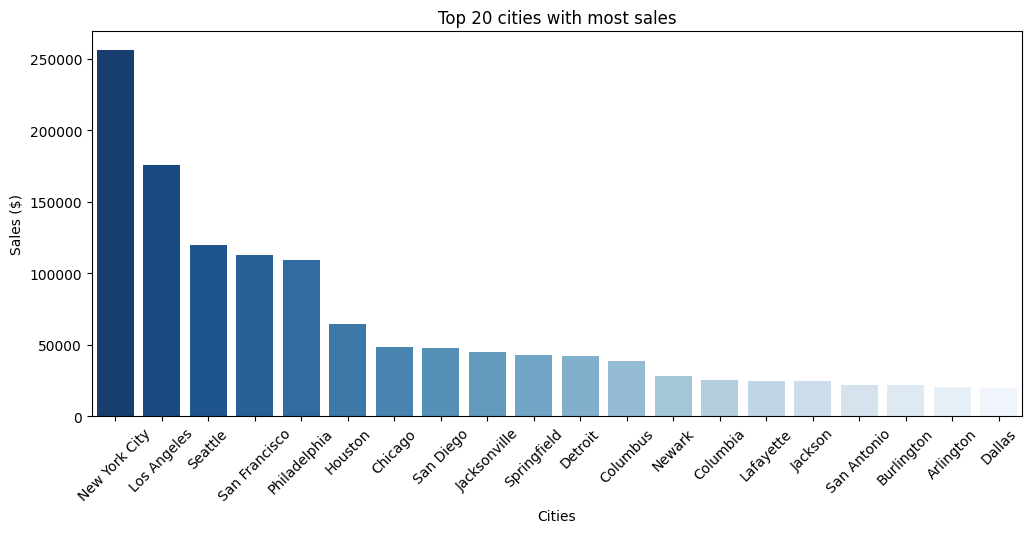

<ipython-input-22-2cf62e92cf60>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_profit.index, y=top_20_profit.values, palette="Greens_r")


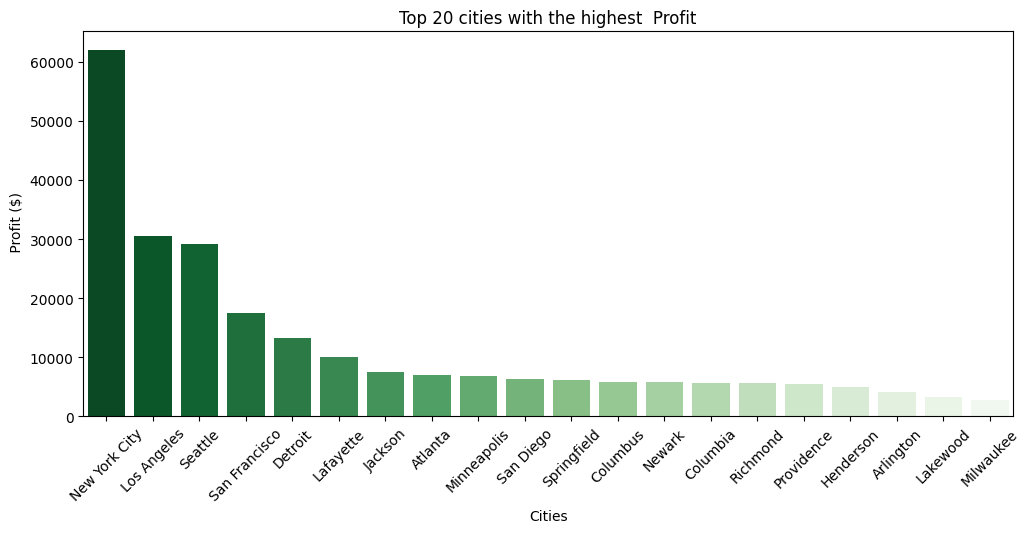

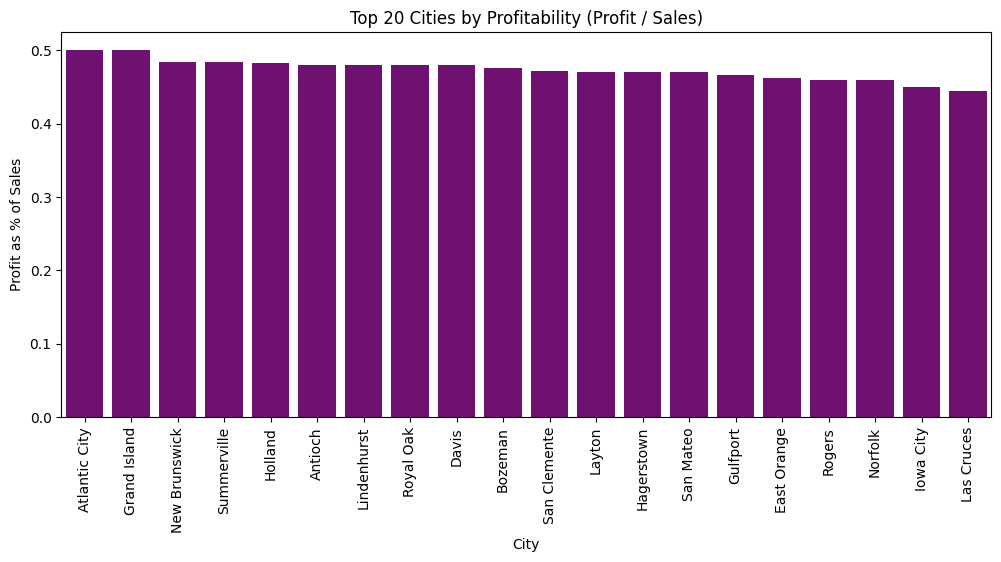

In [22]:
#7:
import matplotlib.pyplot as plt
import seaborn as sns
city_sales = df.groupby('City')['Sales'].sum()
city_profit = df.groupby('City')['Profit'].sum()


# Select the 20 cities with the biggest sales

top_20_sales = city_sales.sort_values( ascending=False).head(20)

# Select the 20 cities with the highest profits
top_20_profit = city_profit.sort_values( ascending=False).head(20)


# Barplot of the 20 cities with the most sales
plt.figure(figsize=(12,5))
sns.barplot(x=top_20_sales.index, y=top_20_sales.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 20 cities with most sales")
plt.ylabel("Sales ($)")
plt.xlabel("Cities")
plt.show()

# 📊 Barplot of the 20 cities with the highest profit
plt.figure(figsize=(12,5))
sns.barplot(x=top_20_profit.index, y=top_20_profit.values, palette="Greens_r")
plt.xticks(rotation=45)
plt.title("Top 20 cities with the highest  Profit")
plt.ylabel(" Profit ($)")
plt.xlabel("Cities")
plt.show()
city_profitability = (city_profit / city_sales).sort_values(ascending=False)
top_20_profitability_cities = city_profitability.head(20)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_20_profitability_cities.index, y=top_20_profitability_cities.values, color='purple')

plt.title("Top 20 Cities by Profitability (Profit / Sales)")
plt.xlabel("City")
plt.ylabel("Profit as % of Sales")
plt.xticks(rotation=90)

plt.show()



<ipython-input-18-625fa5ef4aec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_customers.index, y=top_20_customers.values, palette="Blues_r")


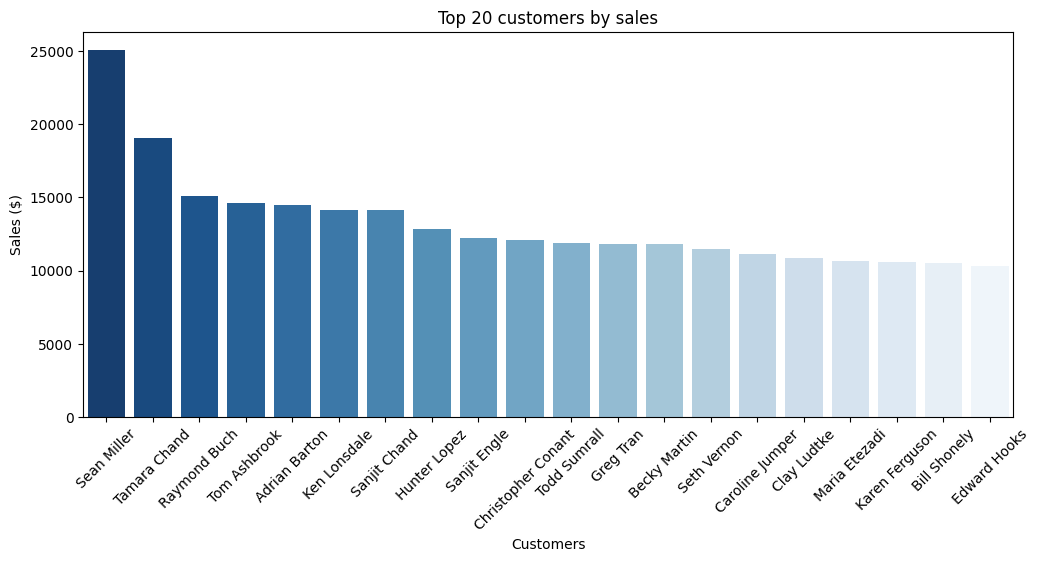

In [18]:
# What are the Top 20 customers by Sales?
#  Calculate total sales per customer
customer_sales = df.groupby("Customer Name")["Sales"].sum()

#  Sort customers based on sales
top_20_customers = customer_sales.sort_values(ascending=False).head(20)

#  Viewing top 20 customers by sales
plt.figure(figsize=(12,5))
sns.barplot(x=top_20_customers.index, y=top_20_customers.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 20 customers by sales")
plt.ylabel("Sales ($)")
plt.xlabel("Customers")
plt.show()

20% of customers contribute to 48.15% total sales.
❌ The Pareto principle (80/20) doesn't apply to sales.


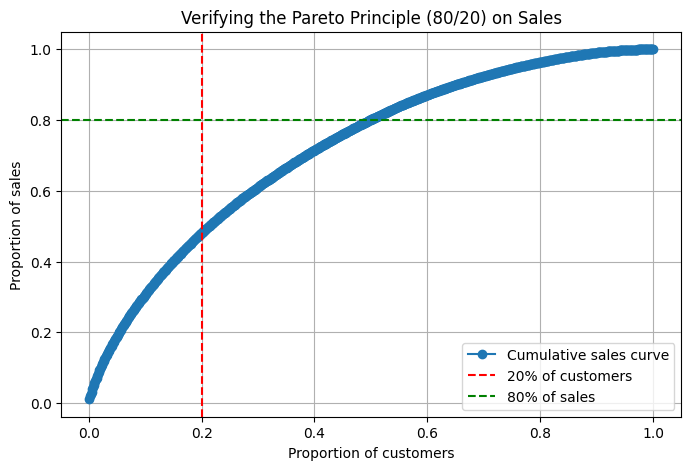

In [16]:
#8:
import numpy as np


customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

#  Calculer total sales
total_sales = customer_sales.sum()

#  Calculate cumulative sales and customer proportion
customer_sales_cumsum = customer_sales.cumsum() / total_sales
customer_count_cumsum = [(i+1) / len(customer_sales) for i in range(len(customer_sales))]

#  Find the point where 20% of customers are reached
threshold_index = int(len(customer_sales) * 0.2)
sales_20_percent_customers = customer_sales_cumsum.iloc[threshold_index]

#  Check if these 20% of customers contribute to at least 80% of sales
pareto_applies = sales_20_percent_customers >= 0.8

#  Show the result
print(f"20% of customers contribute to {sales_20_percent_customers*100:.2f}% total sales.")
if pareto_applies:
    print("✅ The Pareto principle (80/20) applies to sales !")
else:
    print("❌ The Pareto principle (80/20) doesn't apply to sales.")

#  Plot the cumulative sales curve
plt.figure(figsize=(8, 5))
plt.plot(customer_count_cumsum, customer_sales_cumsum, marker='o', linestyle='-', label="Cumulative sales curve")
plt.axvline(x=0.2, color='r', linestyle='--', label="20% of customers")
plt.axhline(y=0.8, color='g', linestyle='--', label="80% of sales")
plt.xlabel("Proportion of customers")
plt.ylabel("Proportion of sales")
plt.title("Verifying the Pareto Principle (80/20) on Sales")
plt.legend()
plt.grid()
plt.show()

Top 20 cities by sales: New York City, Los Angeles, San Francisco, and Seattle contribute significantly.
High-profit cities:  New York City, San Francisco, Seattle show good sales with strong profit .

We need to focus on cities with both high sales and profitability ( with states like California, New York, Texas and cities such as New York City,San Francisco, Seattle, Los Ageles) for marketing investments.

In [20]:
# Dailychallenge:
import numpy as np
import pandas as pd
data_superstore=pd.read_excel('US Superstore data.xls')
data_superstore.head(30)
print(data_superstore.info())
print(data_superstore.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [49]:
# Remove duplicate rows
data_superstore.drop_duplicates()

# Verify duplicates are removed
print(data_superstore.duplicated().sum())

data_superstore.fillna(0, inplace=True)

# Convert the 'Order Date' column to datetime
data_superstore['Order Date'] = pd.to_datetime(data_superstore['Order Date'], format='%Y-%m-%d')
data_superstore.head()

0


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


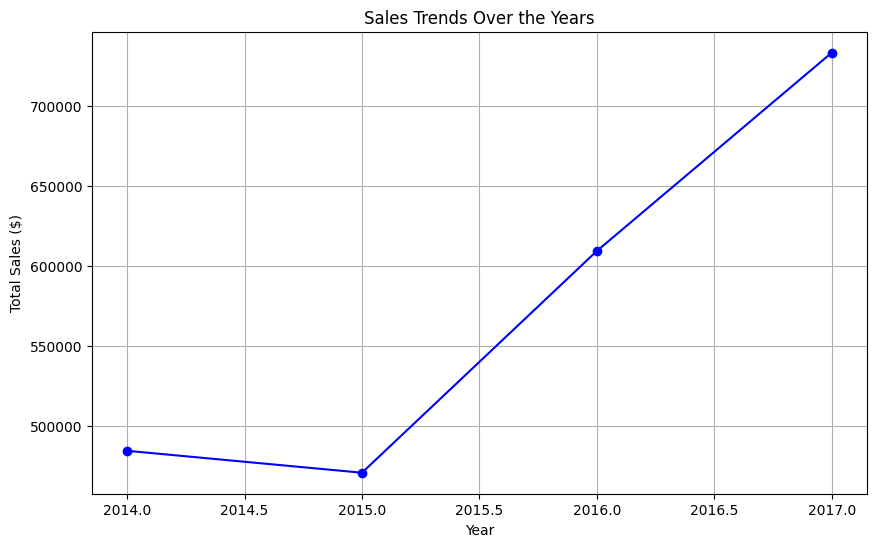

Country
United States    2.297201e+06
Name: Sales, dtype: float64


In [50]:
# 2.Data Visualization with Matplotlib:
import matplotlib.pyplot as plt

# Group by year and calculate total sales
data_superstore['Year'] = data_superstore['Order Date'].dt.year
sales_by_year = data_superstore.groupby('Year')['Sales'].sum()

# Create a simple line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', color='b')
plt.title('Sales Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

import plotly.express as px

# Create an interactive line chart with Plotly
fig = px.line(sales_by_year, x=sales_by_year.index, y=sales_by_year.values,
              labels={'x': 'Year', 'y': 'Total Sales ($)'}, title='Sales Trends Over the Years')
fig.show()

# Assuming the dataset has a 'Country' and 'Sales' column
sales_by_country = data_superstore.groupby('Country')['Sales'].sum().reset_index()
sales_by_country2 = data_superstore.groupby('Country')['Sales'].sum()
# Create an interactive map
fig = px.choropleth(sales_by_country, locations='Country',locationmode='country names', color='Sales',
                    color_continuous_scale='Viridis', title="Sales Distribution by Country")
fig.show()
print(sales_by_country2)

<ipython-input-21-eddbdcfa40d1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='Blues_d')


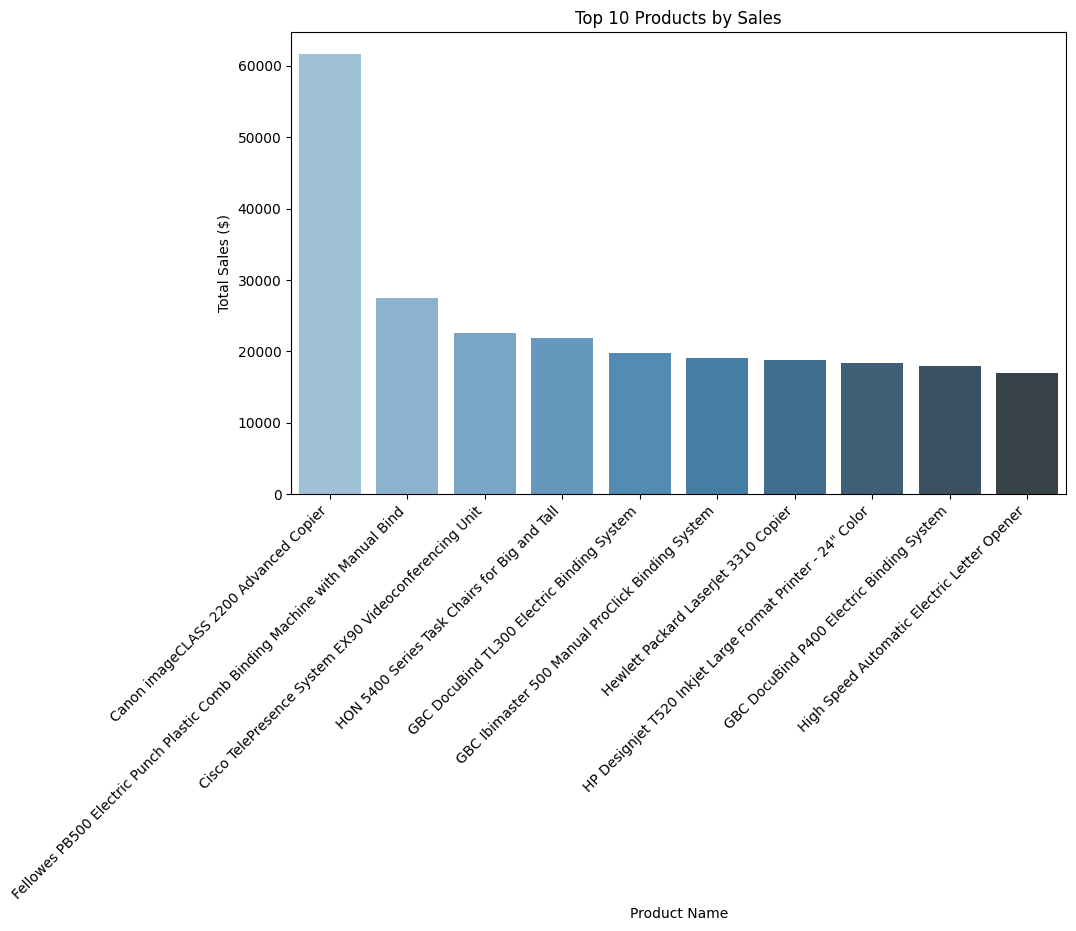

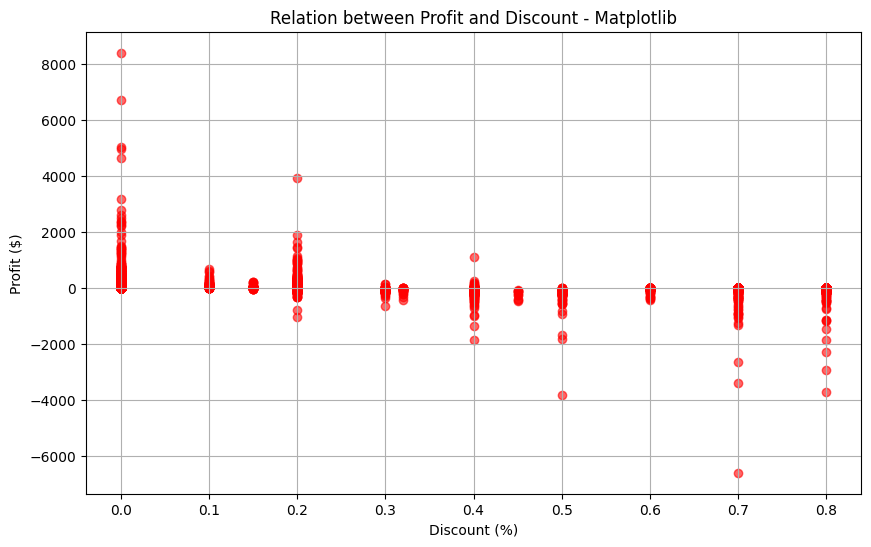

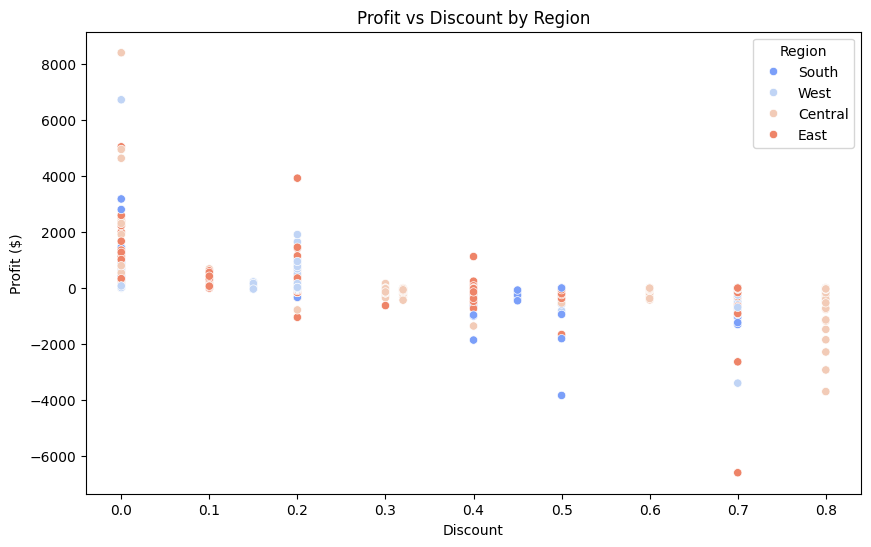

In [21]:
# Data Visualization with Seaborn:
import seaborn as sns

# Group by 'Product Name' and sum the sales
top_products = data_superstore.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='Blues_d')
plt.title('Top 10 Products by Sales')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Name')
plt.ylabel('Total Sales ($)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data_superstore["Discount"], data_superstore["Profit"], alpha=0.6, color="red")
plt.title("Relation between Profit and Discount - Matplotlib")
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.grid(True)
plt.show()

# Scatter plot for Profit vs Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_superstore['Discount'], y=data_superstore['Profit'], hue=data_superstore['Region'], palette='coolwarm')
plt.title('Profit vs Discount by Region')
plt.xlabel('Discount')
plt.ylabel('Profit ($)')
plt.show()

Observation and analysis:
The graphical representation of the sales amount based on the name of the different products highlighted the heterogeneity in the distribution of the sales amount based on the products. With a high amount for only a few products, it would therefore be necessary to prioritize the sale of certain products in particular from a marketing point of view.

Tenth point, the graph relating the profit to the discounts clearly showed the decreasing relationship between the profit amount with the increase in the discount.

Third point, Seaborn is ideal for a quick visualization, while Matplotlib is useful for more specific graphs:
Seaborn is simple, faster, the customization of the theme and colors is automatic and in terms of clarity, it is more readable and elegant while the graphs with matplotlib are less stylized and the customization requires a little more work.